In [1]:
import sys, os
sys.path.append('C:\\Users\Quentin\\Documents\\ALMA_CHILI\\gaia-shock\\src')

## directory
rootdir = r'C:\Users\Quentin\Documents\ALMA_CHILI'
wdir    = r'%s\products'%(rootdir)
#notedir = r'%s\gaia-shock\notebooks_Quentin'%(rootdir)

os.chdir(wdir)  # to change the current directory

import gaia_utils_quentin as gu

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


In [2]:
name_list = ["M67", "NGC2516", "NGC752", "NGC1039", "NGC1342", "NGC1647", "NGC1912"]

clustername = "M67"
RADIUS       = 2.0
errtol       = 1.0
distmax      = 2000
dump_to_file = False

## Read the data and do the conversion

source = gu.source(clustername, RADIUS, errtol)
source.query(dump_to_file,distmax)
#source.read_votable(voname)
source.convert_filter_data(without_mag=True)

SELECT * FROM gaiadr2.gaia_source WHERE CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),                                      CIRCLE('ICRS',132.8250000000,11.8000000000,2.0000000000)) = 1                                      AND abs(pmra_error/pmra)<  1.000000  AND abs(pmdec_error/pmdec)< 1.0000000000                                     AND 1 / parallax_over_error < 1.0000000000                                     AND 1000./parallax < 2000.0;
Query finished.
## Query for M67 done
## Total stars: 35764
## Density star per pc^3: 0.00350

## Conversion on 35764 stars done...
## Stars selected: 30576



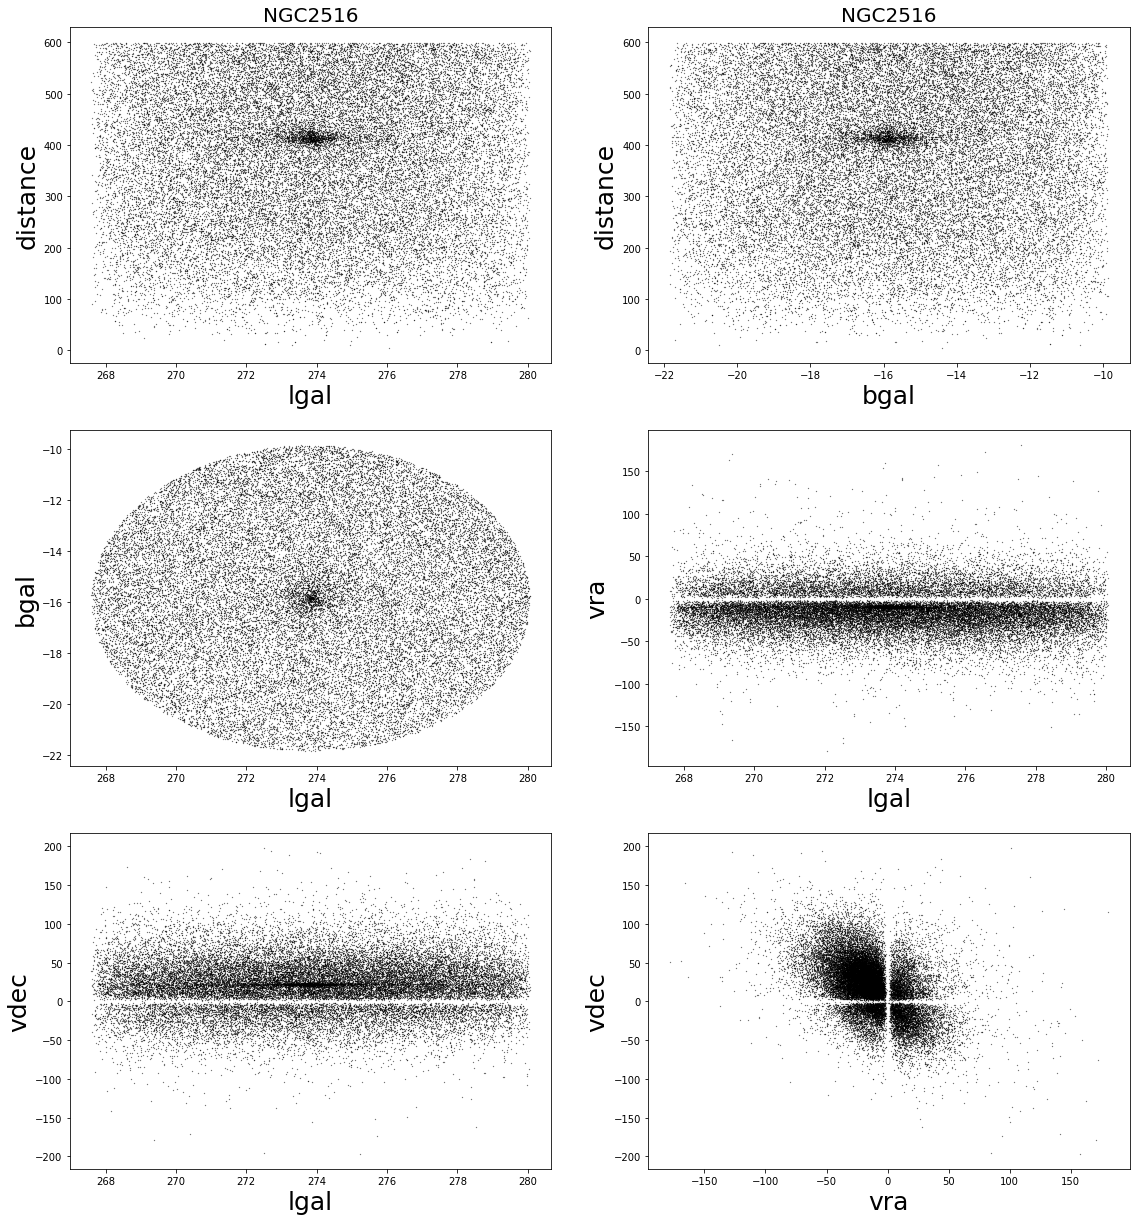

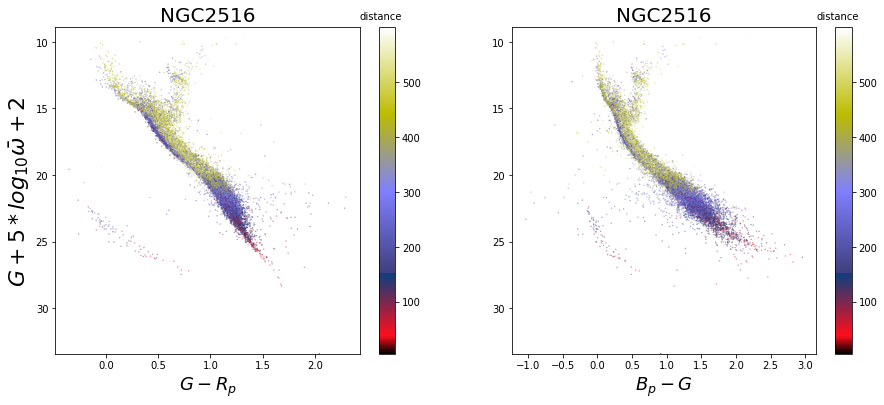

In [3]:
source.plot_information(size=0.05)

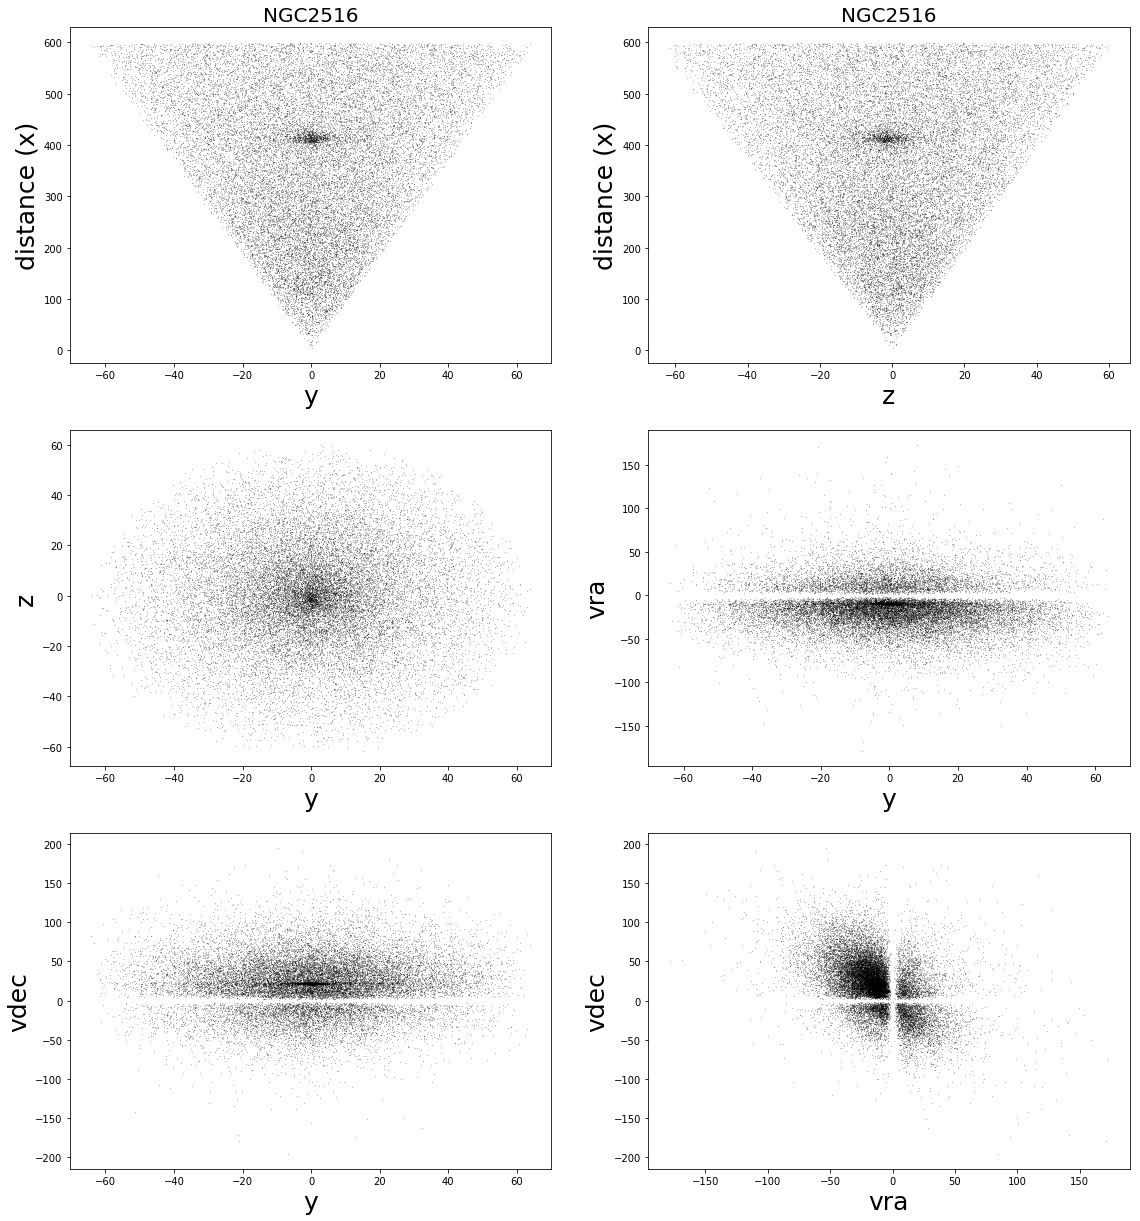

In [5]:
source.convert_to_cartesian()
source.plot_information(size=0.01,cartesian=True, HRD=False)

SELECT * FROM gaiadr2.gaia_source WHERE CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),                                      CIRCLE('ICRS',29.4208000000,37.7850000000,5.0000000000)) = 1                                      AND abs(pmra_error/pmra)<  0.020000  AND abs(pmdec_error/pmdec)< 0.0200000000                                     AND 1 / parallax_over_error < 0.0200000000                                     AND 1000./parallax < 600.0;
## NGC752-5.0deg-0.02err.vot created
## Query for NGC752 done
## Total stars: 7630
## Density star per pc^3: 0.00441

## Conversion on 7630 stars done...
## Stars selected: 7580



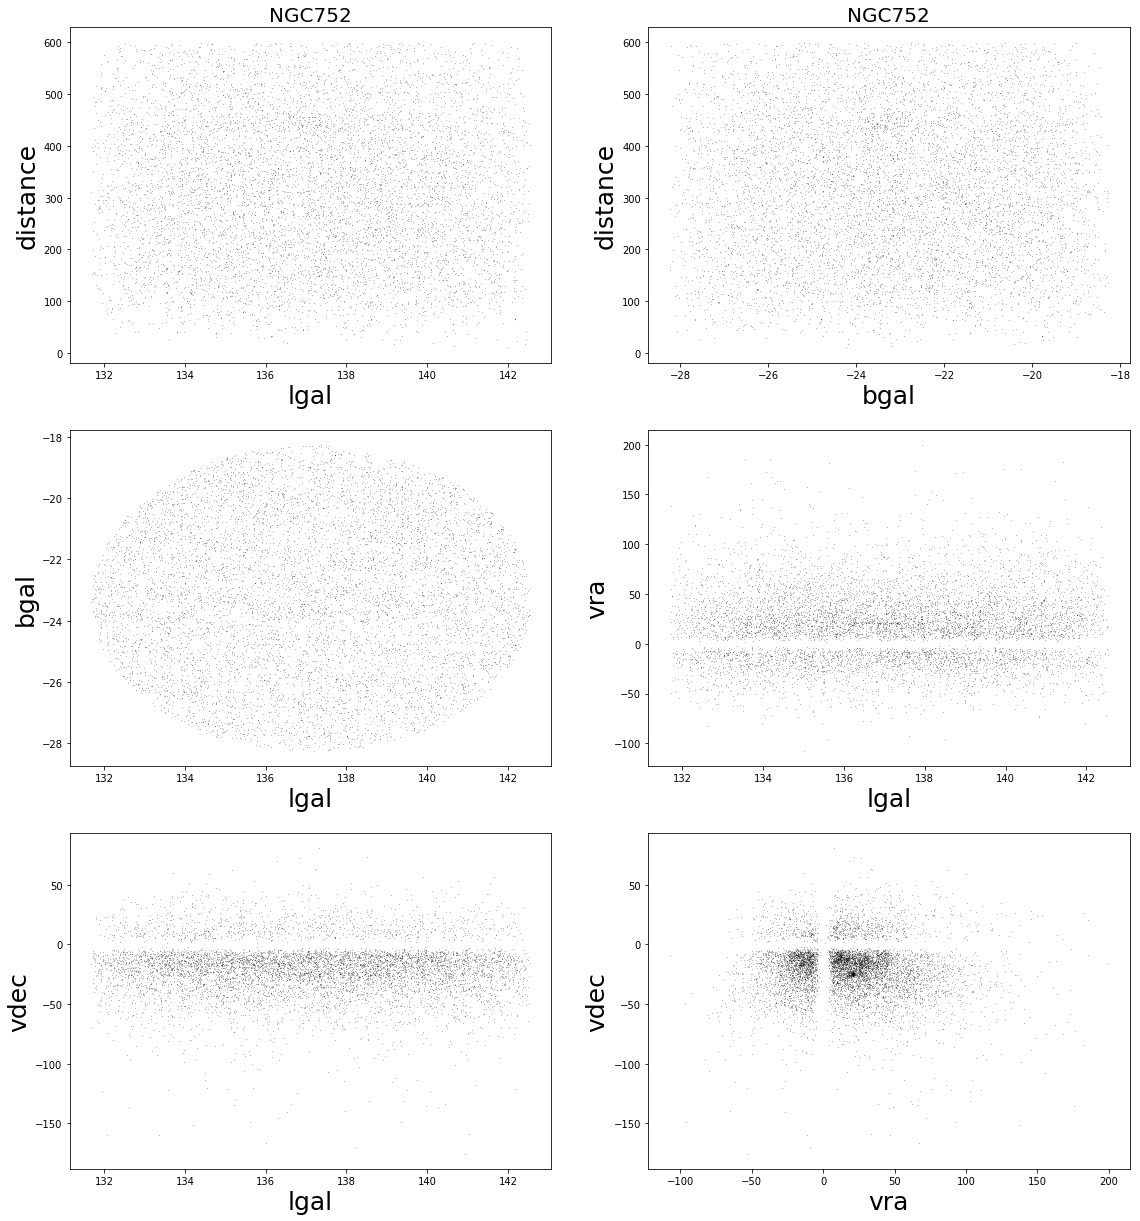

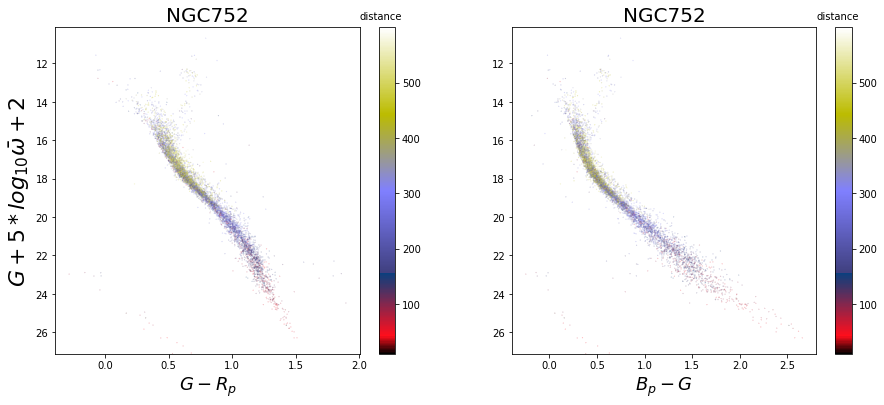

SELECT * FROM gaiadr2.gaia_source WHERE CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),                                      CIRCLE('ICRS',130.1000000000,19.6667000000,8.0000000000)) = 1                                      AND abs(pmra_error/pmra)<  0.020000  AND abs(pmdec_error/pmdec)< 0.0200000000                                     AND 1 / parallax_over_error < 0.0200000000                                     AND 1000./parallax < 300.0;
## NGC2632-8.0deg-0.02err.vot created
## Query for NGC2632 done
## Total stars: 8823
## Density star per pc^3: 0.01580

## Conversion on 8823 stars done...
## Stars selected: 8708



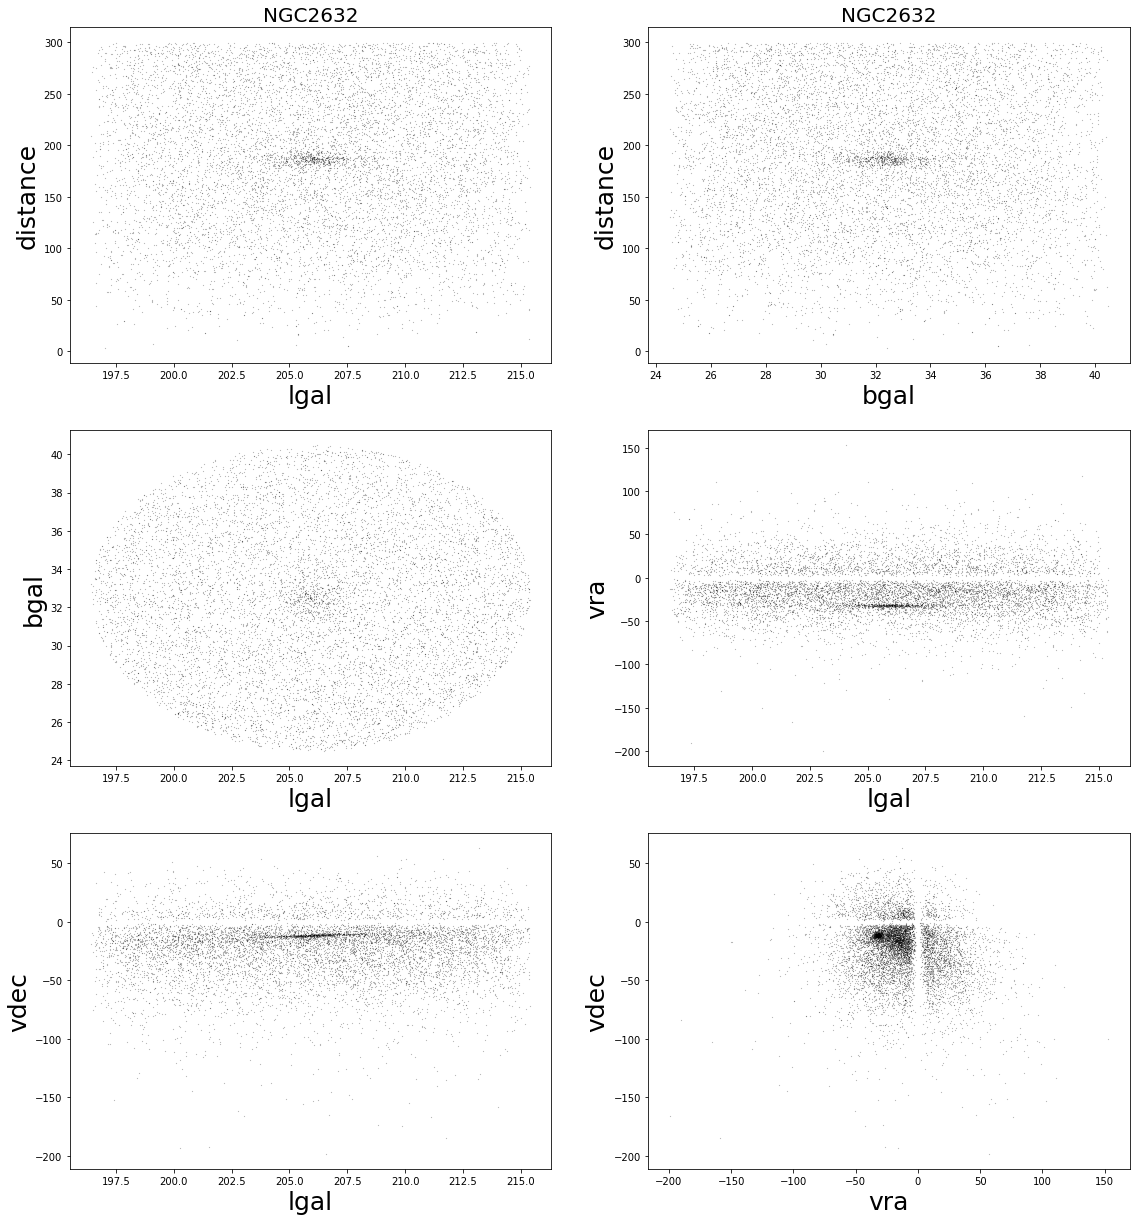

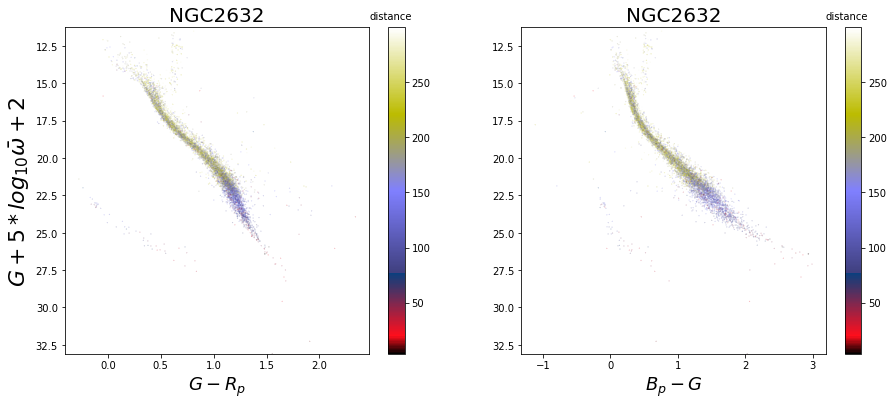

SELECT * FROM gaiadr2.gaia_source WHERE CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),                                      CIRCLE('ICRS',72.1125000000,10.9367000000,8.0000000000)) = 1                                      AND abs(pmra_error/pmra)<  0.020000  AND abs(pmdec_error/pmdec)< 0.0200000000                                     AND 1 / parallax_over_error < 0.0200000000                                     AND 1000./parallax < 600.0;
## NGC1662-8.0deg-0.02err.vot created
## Query for NGC1662 done
## Total stars: 18715
## Density star per pc^3: 0.00419

## Conversion on 18715 stars done...
## Stars selected: 18544



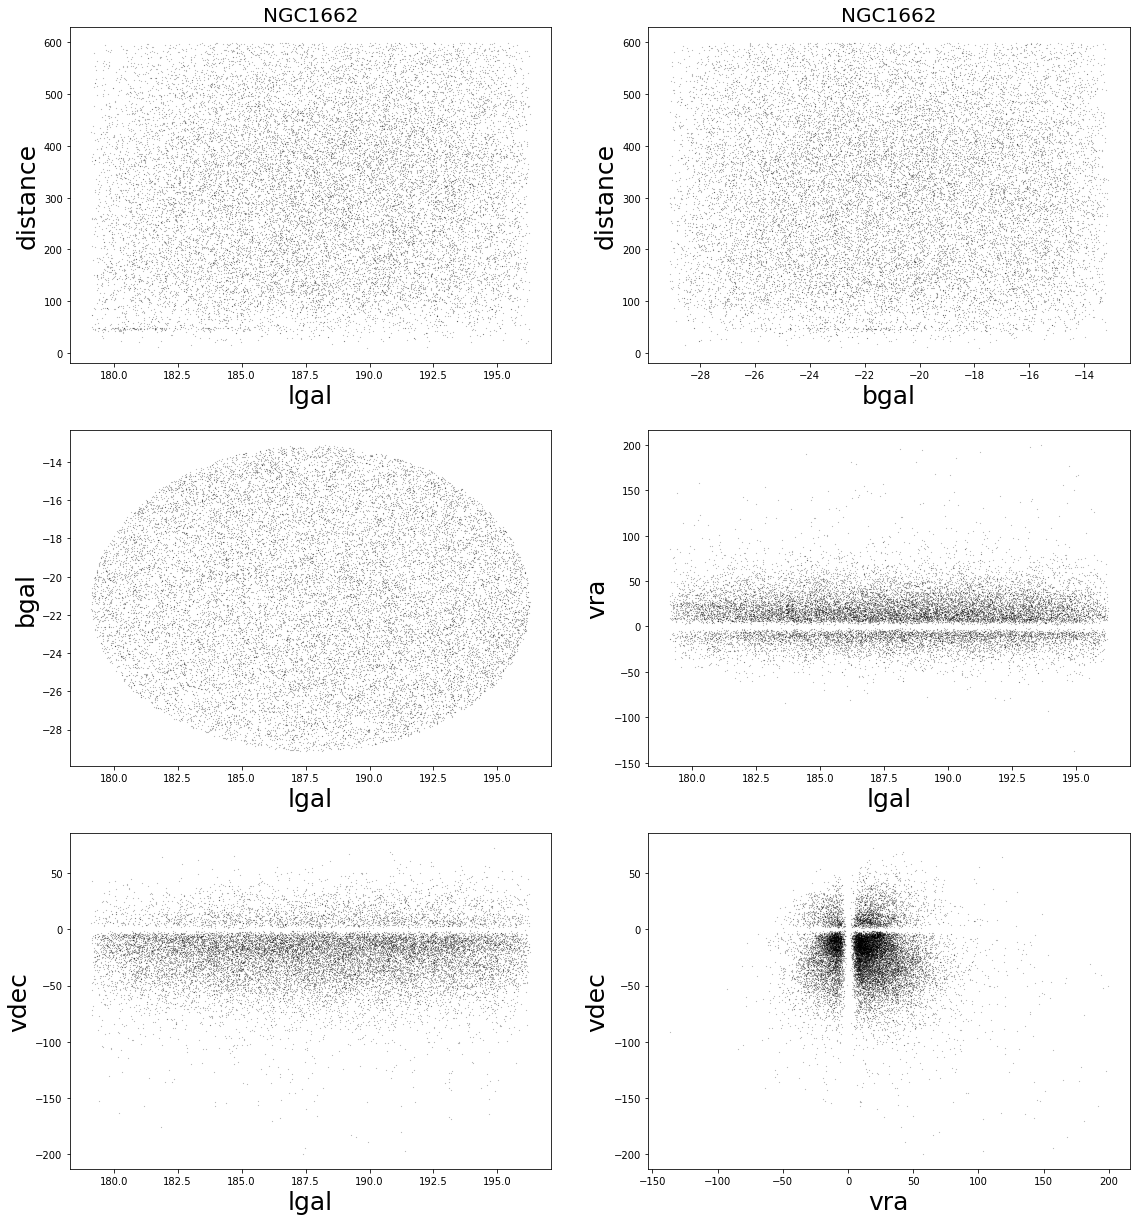

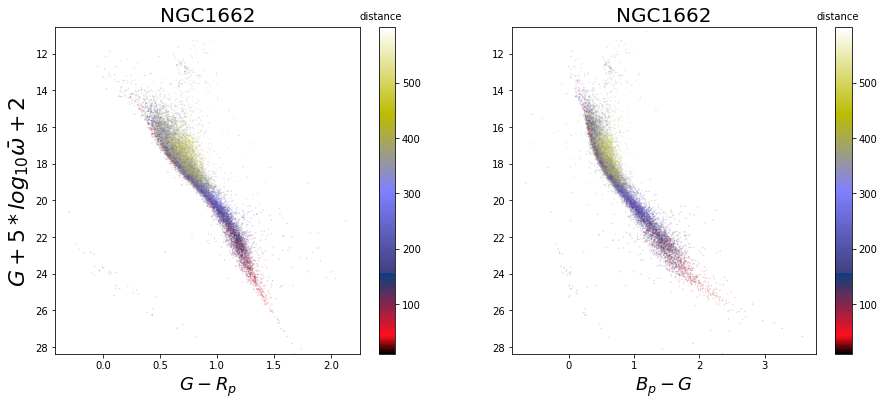

In [41]:
## Read the data and do the conversion
# NGC6625, Collinder107, NGC2252, NGC2682, Collinder65, Collinder21, NGC6811, Turner 5, Sco OB4, NGC 2548
errtol=0.02
dump_to_file = True
tab_source = []
for clustername, RADIUS, distmax in zip(["NGC752","NGC2632","NGC1662"],[5.0,8.0,8.0],[600,300,600]) :
    source = gu.source(clustername, RADIUS, errtol)
    source.query(dump_to_file,distmax)
    #source.read_votable(voname)
    source.convert_filter_data(without_mag=True)
    source.plot_information(size=0.01)
    tab_source.append(source)

In [ ]:
source.plot_information(size=0.1)

In [ ]:
source.convert_to_cartesian()
source.plot_information(size=0.01,cartesian=True)

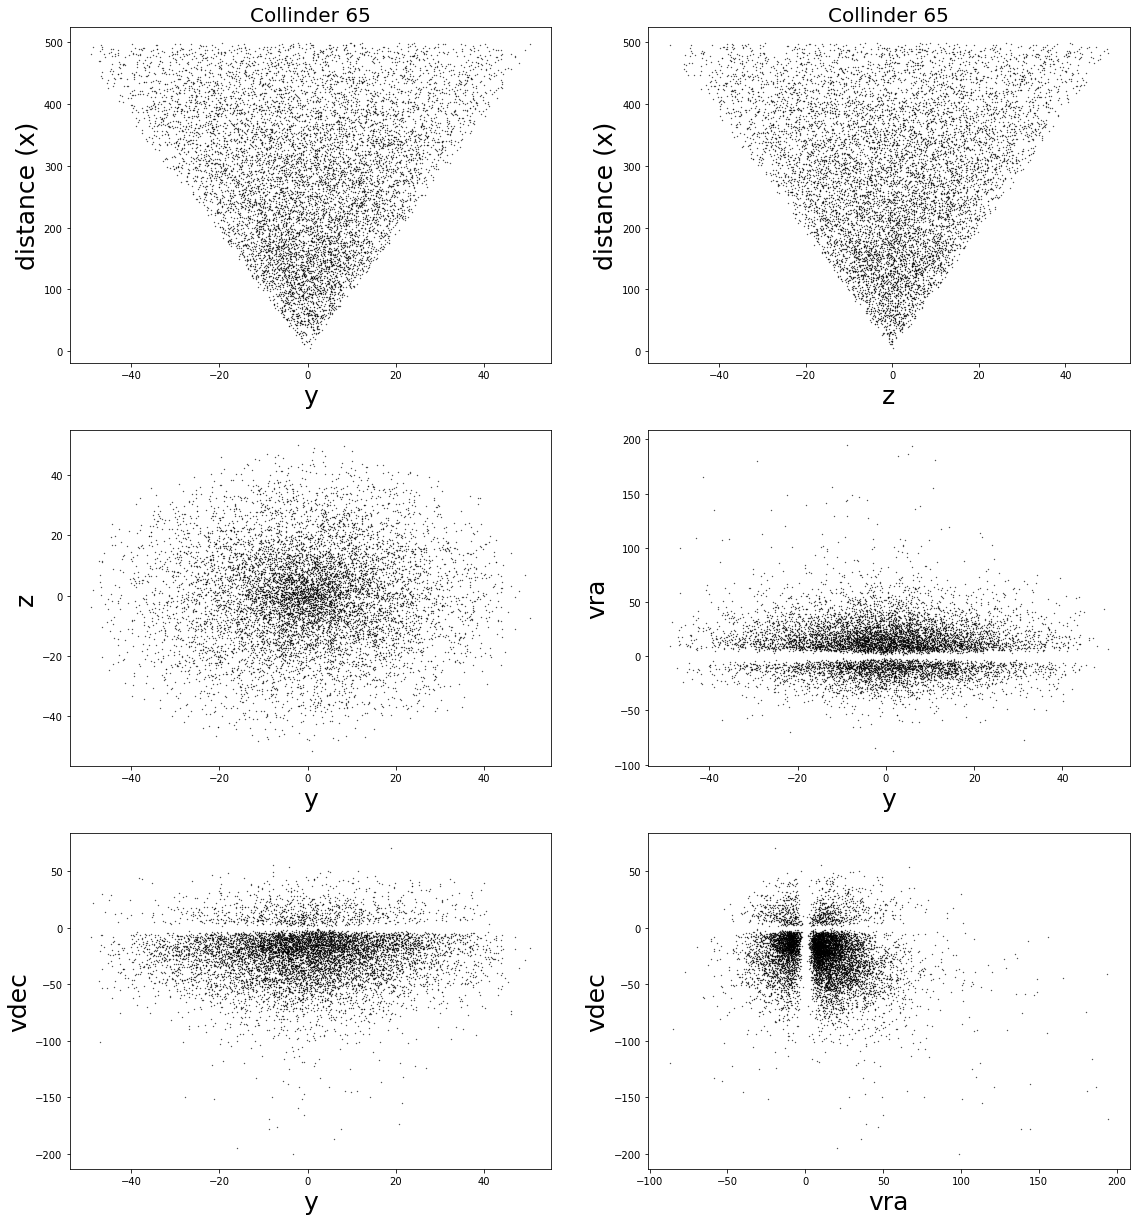

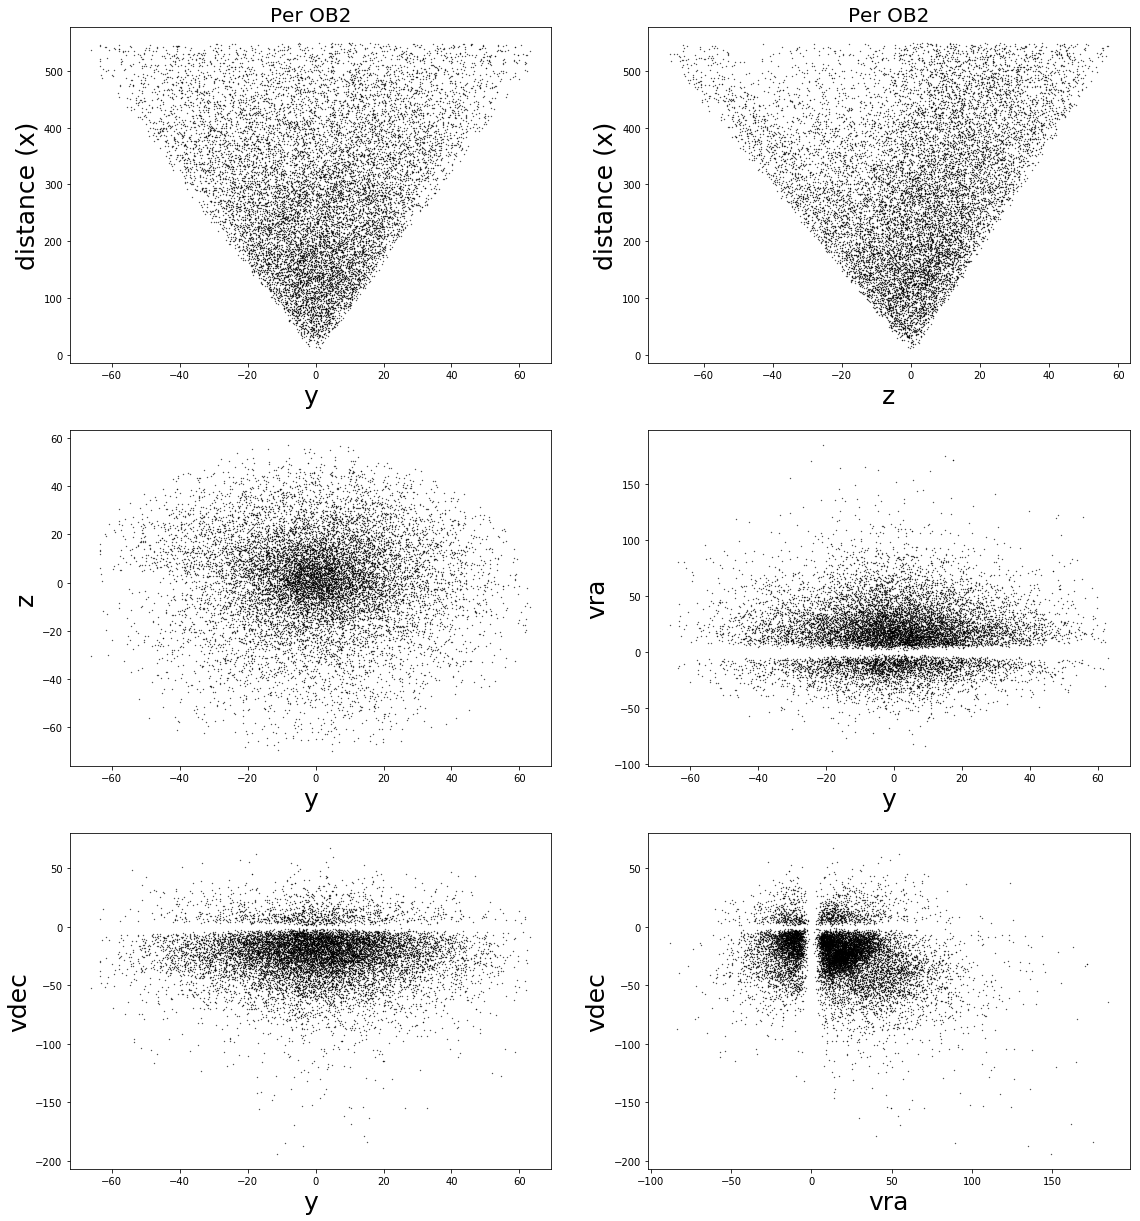

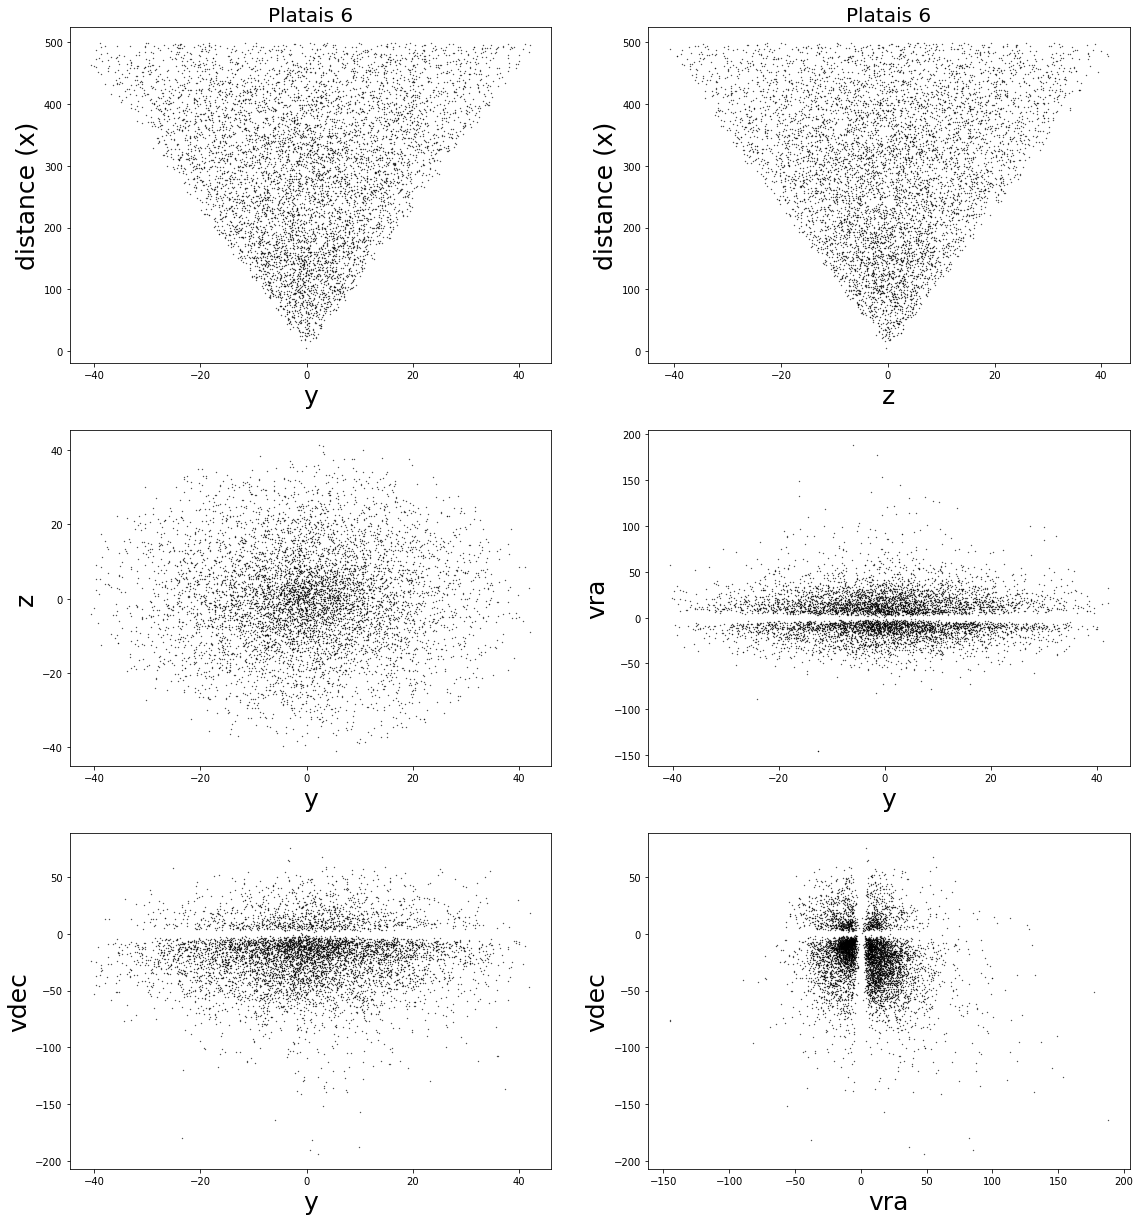

In [11]:
tab_source[0].convert_to_cartesian()
tab_source[0].plot_information(size=0.1,cartesian=True,HRD=False)

### -------------------------------------------------------------------
# Error on data

In [32]:
print(len(source.data['ra']))
#source.data['ra'] = source.data['ra'][label]
print(type(source.data['ra'][label]))
print(len(source.data))

31210
<class 'astropy.table.column.MaskedColumn'>
31210


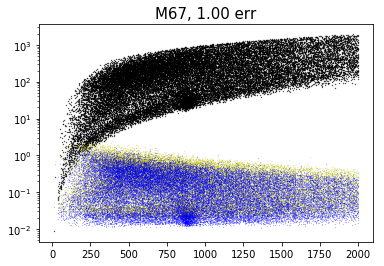

In [40]:
ifinal = source.unmasked
parallax_err = np.array(source.data['parallax_error'][ifinal])
dist = source.df[:,0]
dist_err = dist**2 * parallax_err / 1000
ra = np.array(source.data['ra'][ifinal])
dec = np.array(source.data['dec'][ifinal])
ra_err = np.array(source.data['ra_error'][ifinal])
dec_err = np.array(source.data['dec_error'][ifinal])
pmra = np.array(source.data['pmra'][ifinal])
pmra_error = np.array(source.data['pmra_error'][ifinal])
pmdec = np.array(source.data['pmdec'][ifinal])
pmdec_error = np.array(source.data['pmdec_error'][ifinal])

tol = 0.050


#plt.scatter(dist,parallax_err/parallax,c='k',s=0.1)
plt.title("%s, %.2f err"%(source.name,source.errtol),fontsize=15)
plt.scatter(dist,dist_err,c='k',s=0.1)
plt.scatter(dist,ra_err,c='y',s=0.01)
plt.scatter(dist,dec_err,c='b',s=0.01)
#plt.scatter(dist,pmra_error/pmra,c='r',s=0.1)
#plt.scatter(dist,pmdec_error/pmdec,c='m',s=0.1)
#plt.plot(np.arange(2000),tol * np.ones(2000), c='r')
plt.yscale('log')
plt.show()

In [32]:
def lissage(x,y,p):
    "smoothing y data computing the Moving average"
    Lyout=[]; Lxout = np.copy(x[p: -p])
    for index in range(p, len(y)-p):
        Lyout.append(np.mean(y[index-p : index+p+1]))
    return Lxout,Lyout

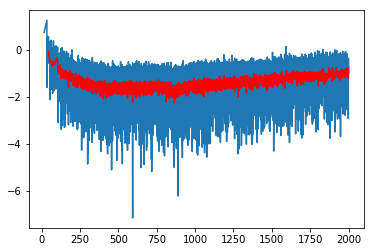

0.06502172421197432


In [35]:
dist = np.sort(source.df[:,0])
distm = dist[1:] - dist[:-1]  
x, y = lissage(dist[1:],np.log10(distm), 10)
plt.plot(dist[1:],np.log10(distm))
plt.plot(x,y,c='r')
plt.show()
print(np.mean(distm))